# Solution

In [450]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [451]:
raw_df = pd.read_csv("./data.csv", encoding='Windows-1251', delimiter=',')

In [452]:
data = raw_df[raw_df.columns[0]].str.split(pat = ',', expand = True)
data.columns = ['num_sick_day', 'age', 'sex']
data.head()

,num_sick_day,age,sex
0,5,39,"""Ж"""
1,4,54,"""М"""
2,4,26,"""М"""
3,5,42,"""М"""
4,4,29,"""М"""


In [453]:
# Преобразование данных (приводим все в int и заменяем М, Ж на 1, 0)
data.num_sick_day = pd.to_numeric(data.num_sick_day)
data.age = pd.to_numeric(data.age)
data.sex = data.sex.apply({'"М"': 1, '"Ж"': 0}.get)

# EDA

## Общая информация

In [454]:
def first_descriptions(df: pd.DataFrame) -> None:
    """Displays some dataset description like:
    * head of dataset
    * info(generated by pandas)
    * categorical features uniques
    * dublicates
    * NaN's
    Args:
        df (pd.DataFrame): DataFrame
    """
    print(' Dataset first description '.center(126, '*'))

    print(' Head of dataset '.center(126, '*'))
    display(df.head(5))

    print(' Pandas-Generated info '.center(126, '*'))
    display(df.info())

    print(' Categorical features unique '.center(126, '*'))
    for column in df.select_dtypes(include=['object']):
        print(column)
        print(df[column].unique(), '\n')

    print(' Dublicate check '.center(126, '*'))
    print(f"Number of dublicates is : {df.duplicated().sum()}")

    print(' NaN check '.center(126, '*'))
    print(f"Total number of NaN is : {df.isna().sum().sum()}")
    print(f"Number of NaN by column  : \n {df.isna().sum()}")

In [455]:
# Основная информация о данных
first_descriptions(data)

************************************************* Dataset first description **************************************************
****************************************************** Head of dataset *******************************************************


,num_sick_day,age,sex
0,5,39,0
1,4,54,1
2,4,26,1
3,5,42,1
4,4,29,1


*************************************************** Pandas-Generated info ****************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   num_sick_day  237 non-null    int64
 1   age           237 non-null    int64
 2   sex           237 non-null    int64
dtypes: int64(3)
memory usage: 5.7 KB


None

************************************************ Categorical features unique *************************************************
****************************************************** Dublicate check *******************************************************
Number of dublicates is : 72
********************************************************* NaN check **********************************************************
Total number of NaN is : 0
Number of NaN by column  : 
 num_sick_day    0
age             0
sex             0
dtype: int64


## Графики

### Распределения признаков

In [456]:
def plot_distribution(feature_name, bins=10, kde=True):
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    sns.histplot(
        data=data,
        x=feature_name,
        bins=bins,
        ax=ax,
        kde=kde,   
    )
    ax.set_title(f"Распределение признака {feature_name}")
    plt.show()

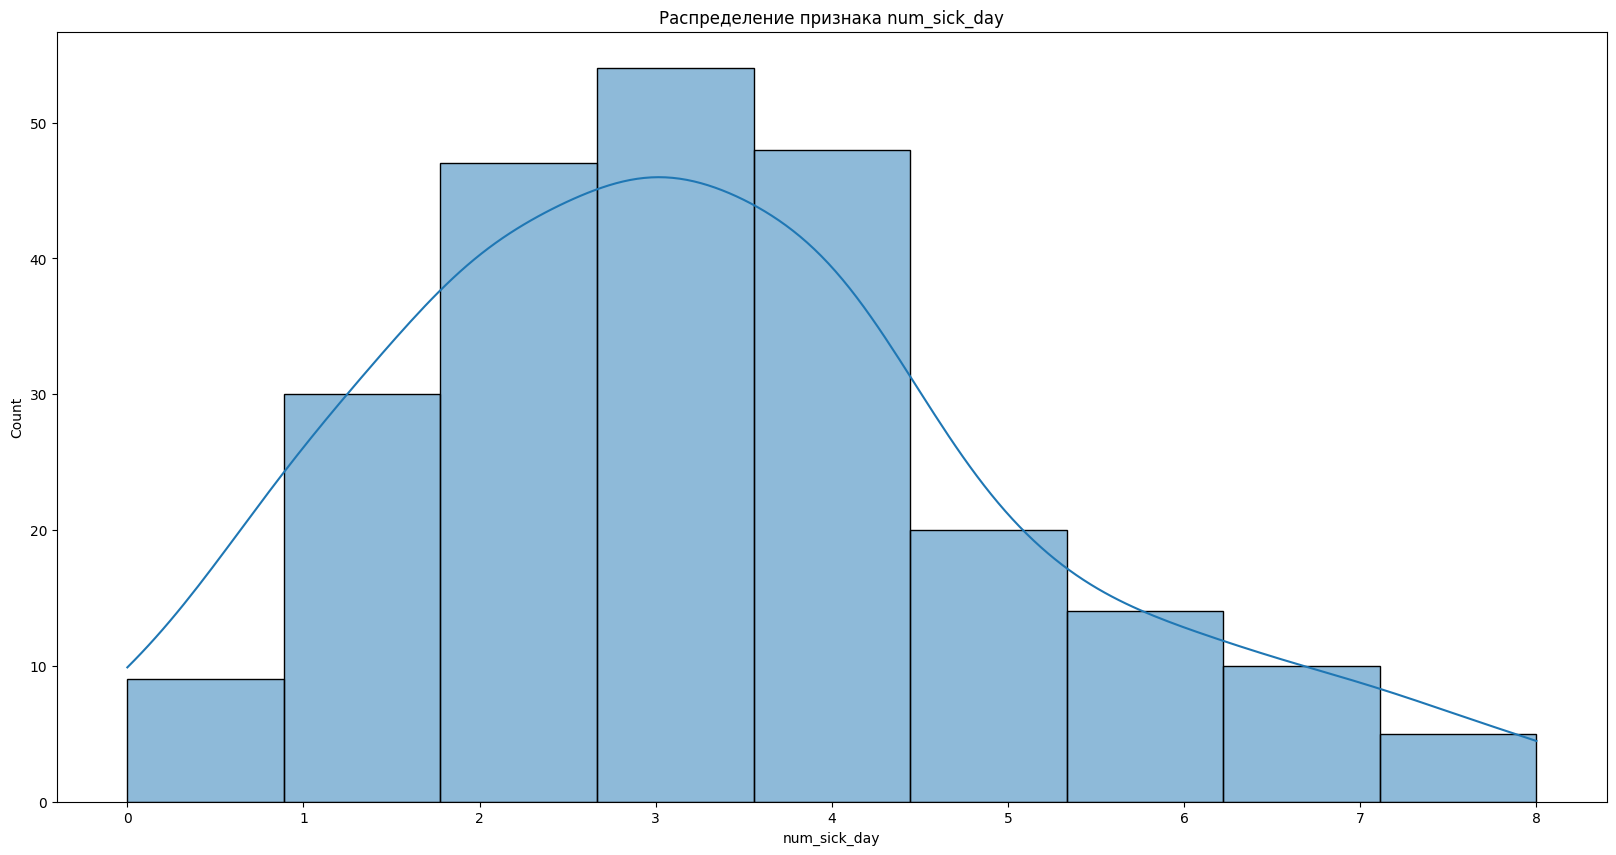

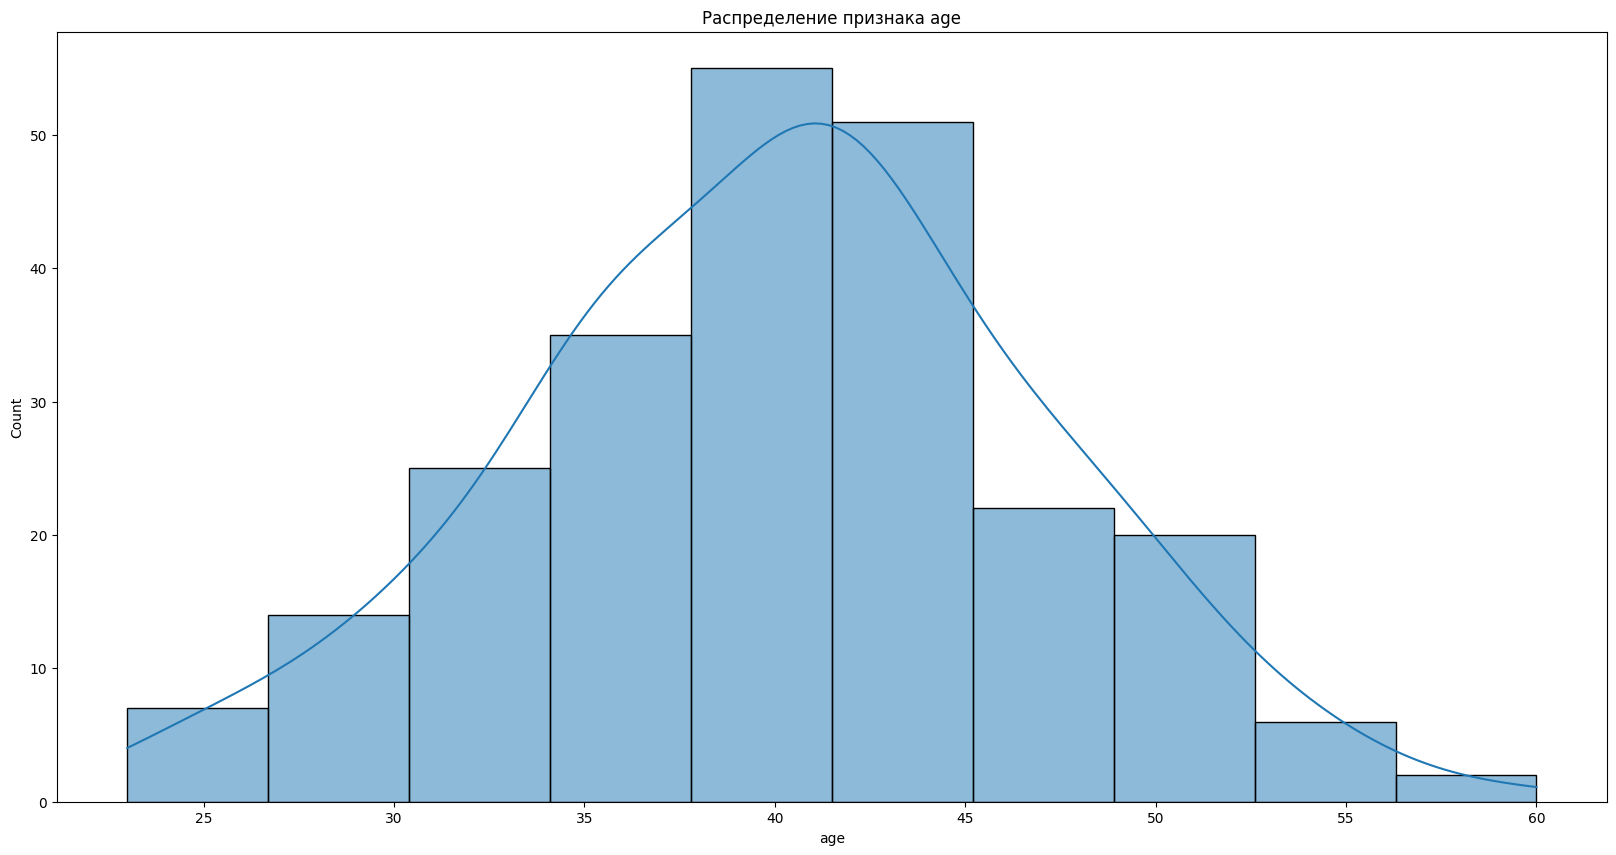

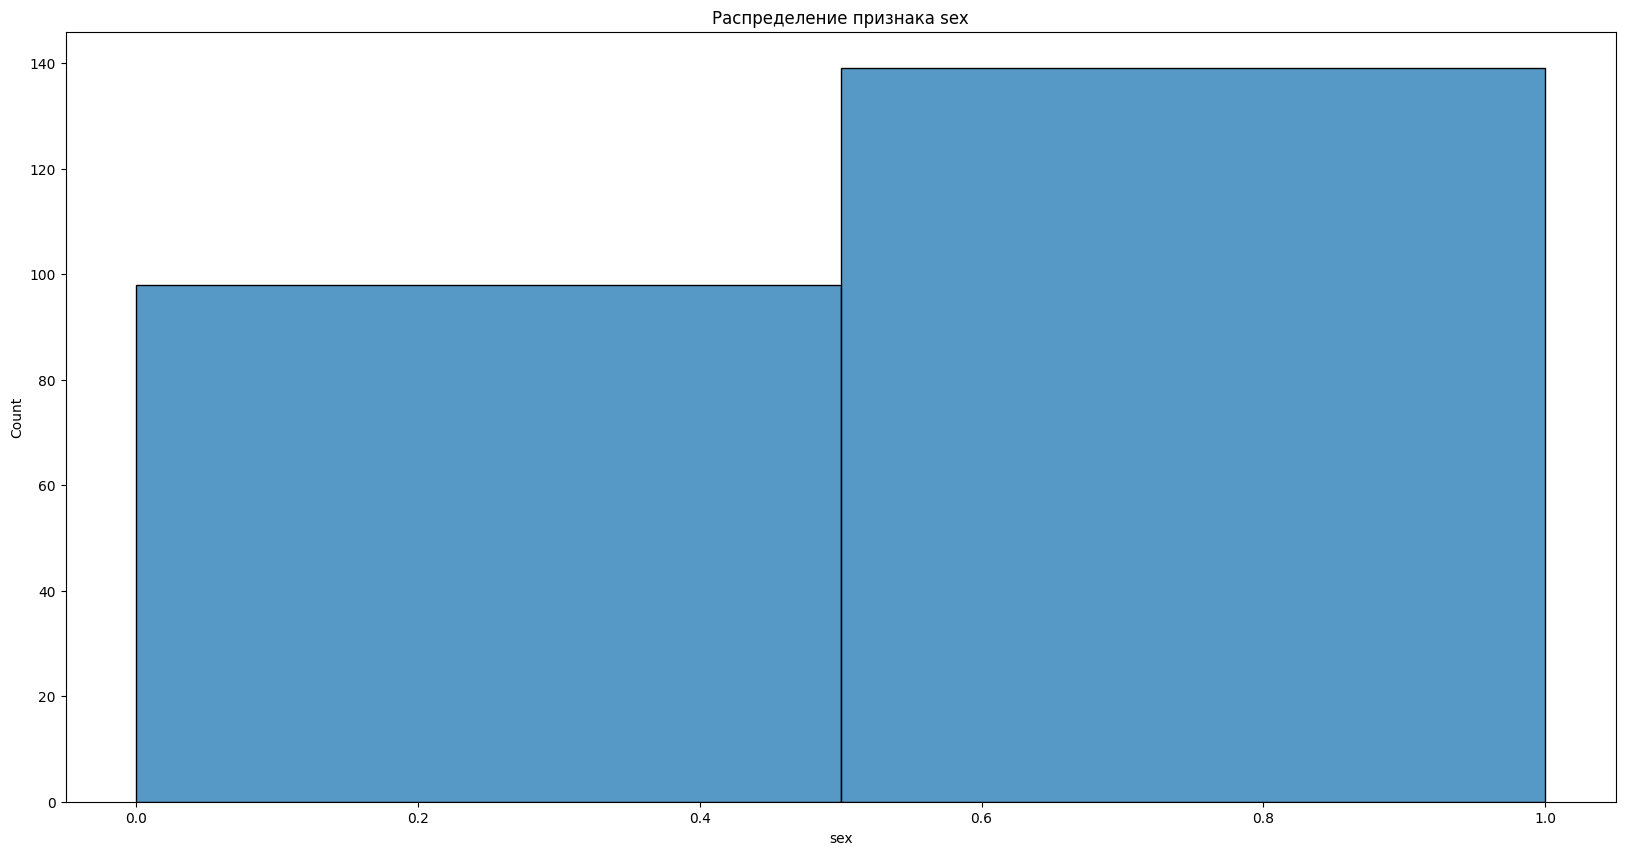

In [457]:
plot_distribution('num_sick_day', bins=9)
plot_distribution('age')
plot_distribution('sex',bins=2, kde=False)

### Зависимости между переменными

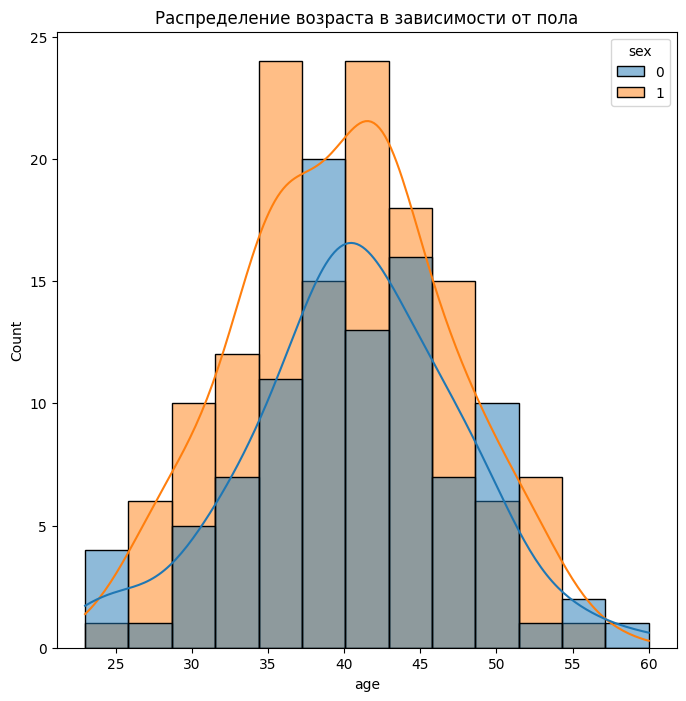

Основные статистики для возраста в зависимости от пола


,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
0,98.0,40.581633,6.999151,23.0,36.0,41.0,45.0,60.0
1,139.0,39.899281,6.797586,23.0,35.0,41.0,44.0,57.0


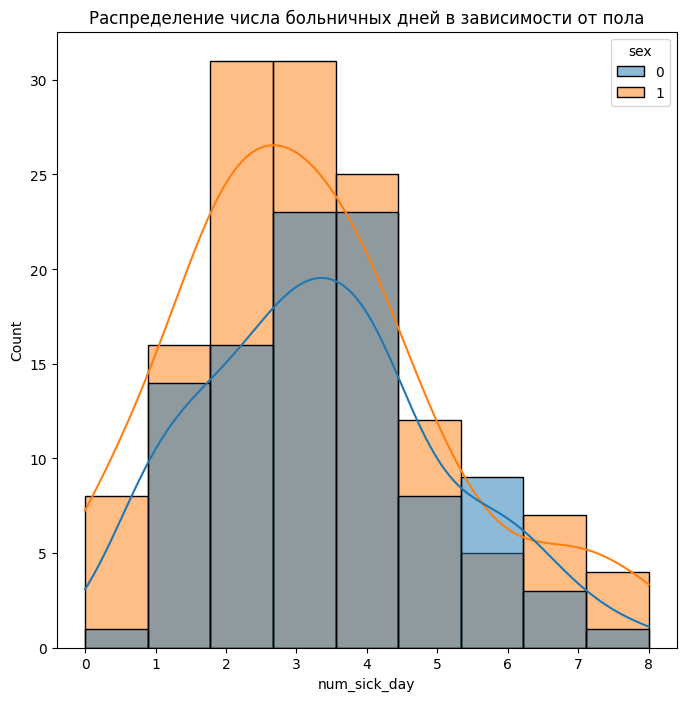

Основные статистики для числа больничных дней в зависимости от пола


,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
0,98.0,3.367347,1.689188,0.0,2.0,3.0,4.0,8.0
1,139.0,3.179856,1.889144,0.0,2.0,3.0,4.0,8.0


In [509]:
# Посмотрим, какие зависимости у переменных с полом
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.histplot(
    data=data,
    x='age',
    hue='sex',
    stat='count',
    element='bars',
    kde=True,
    ax=ax
)
ax.set_title("Распределение возраста в зависимости от пола")
plt.show()
print("Основные статистики для возраста в зависимости от пола")
display(data.groupby('sex')['age'].describe())


fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.histplot(
    data=data,
    x='num_sick_day',
    hue='sex',
    stat='count',
    element='bars',
    kde=True,
    ax=ax,
    bins=9
)
ax.set_title("Распределение числа больничных дней в зависимости от пола");
plt.show()
print("Основные статистики для числа больничных дней в зависимости от пола")
display(data.groupby('sex')['num_sick_day'].describe())

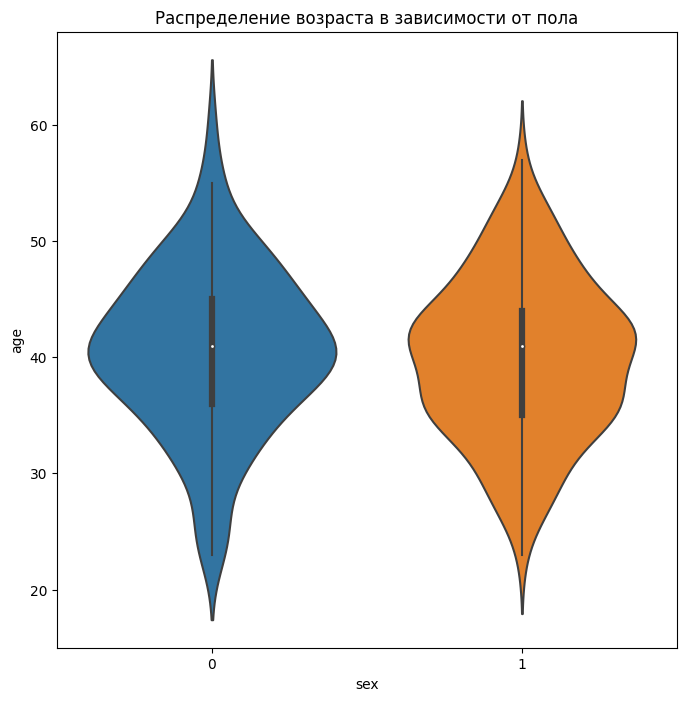

Основные статистики для возраста в зависимости от пола


,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
0,98.0,40.581633,6.999151,23.0,36.0,41.0,45.0,60.0
1,139.0,39.899281,6.797586,23.0,35.0,41.0,44.0,57.0


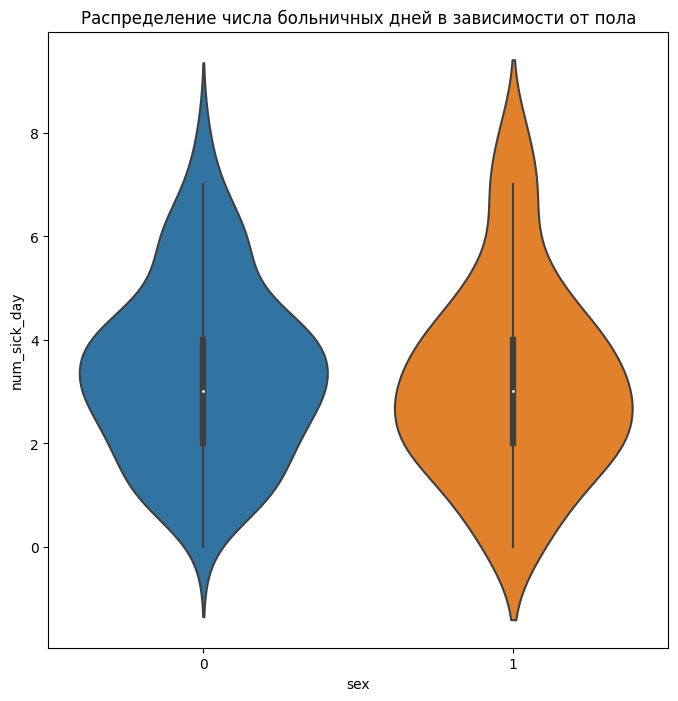

Основные статистики для числа больничных дней в зависимости от пола


,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
0,98.0,3.367347,1.689188,0.0,2.0,3.0,4.0,8.0
1,139.0,3.179856,1.889144,0.0,2.0,3.0,4.0,8.0


In [510]:
# То же, что и до этого, только со скрипками
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.violinplot(
    data, 
    x='sex', 
    y='age',
    ax=ax
)
ax.set_title("Распределение возраста в зависимости от пола")
plt.show()
print("Основные статистики для возраста в зависимости от пола")
display(data.groupby('sex')['age'].describe())

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.violinplot(
    data, 
    x='sex', 
    y='num_sick_day',
    ax=ax
)
ax.set_title("Распределение числа больничных дней в зависимости от пола");
plt.show()
print("Основные статистики для числа больничных дней в зависимости от пола")
display(data.groupby('sex')['num_sick_day'].describe())

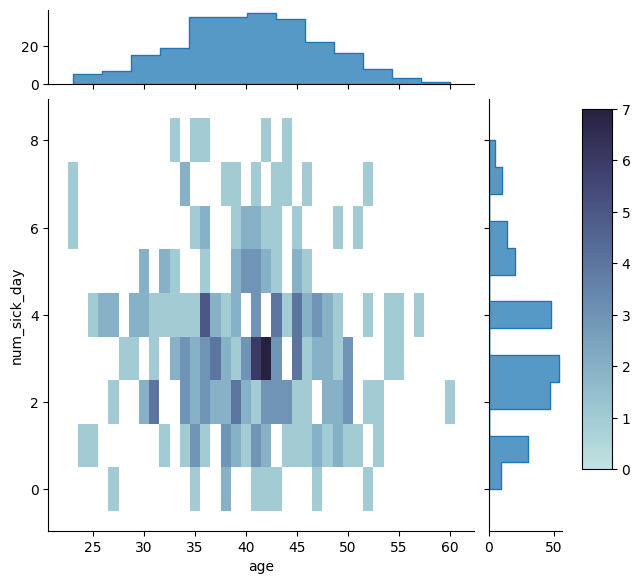

In [543]:
# Последнее, что хочется посмотреть - зависимость возраста и числа больничных
g = sns.JointGrid(data=data, x="age", y="num_sick_day", marginal_ticks=True)
cax = g.figure.add_axes([1, 0.2, .05, .6])
g.plot_joint(
    sns.histplot, 
    discrete=(True, True), 
    cbar=True, 
    cbar_ax=cax, 
    cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
)
g.plot_marginals(sns.histplot, element="step");

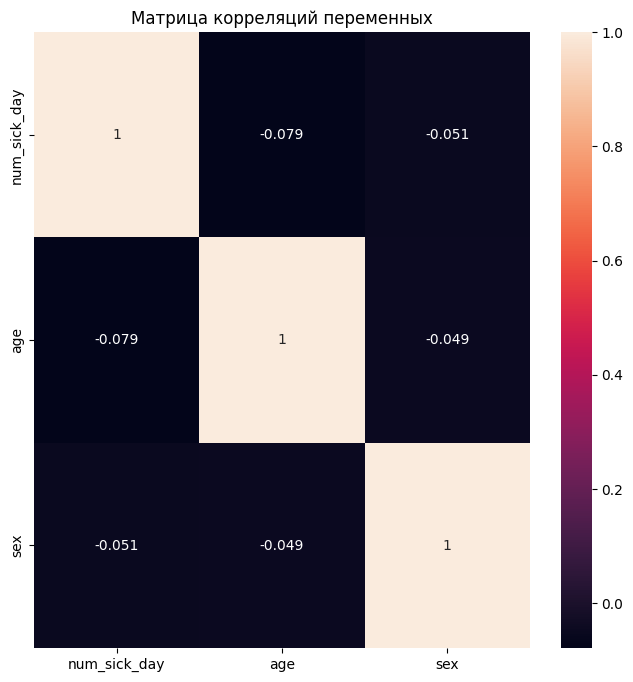

In [559]:
# Ну и на последок, матрица корреляций
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.heatmap(data.corr(), annot=True, ax=ax)
ax.set_title('Матрица корреляций переменных');

Выводы:  
1) Есть дисбаланс классов женщина/мужчина, нужно это учитывать для поведения дальнейших исследований
2) Переменные num_sick_day и age распределены почти нормально
3) От переменной sex почти не зависит age, но немного зависит num_sick_day (визуально)

In [427]:
# Проверим на нагенериных данных
#data = pd.DataFrame({
#    'num_sick_day': [5]*10 + [1]*5 + [5]*2 + [1]*13,
#    'age': [0]*(10+5+2+13),
#    'sex':[1]*10 + [1]*5 + [0]*2 + [0]*13
#})

# Гипотезы

In [544]:
age = 35
work_day = 2

# Гипотеза 1	
Мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще женщин.  
## Решение:  
1) Формулируем гипотезы  
$H_0 : $ Нет разницы между мужчинами и женщинами, которые пропустили более 2х рабочих дней  
$H_1 : $ Разница между мужчинами и женщинами есть
2) Выберем уровень значимости  
**Пусть $\alpha = 0.05$**  
  
3) Выберем, какой тест будем использовать
Использовать будем критерий согласия Пирсона, так как нужно проверить соответствие наблюдаемых частот с теоретическими. Переформулируем гипотезы:  
$H_0 : $ Частота пропуска 2х и более дней для женщин такая же как и у мужчин  
$H_1 : $ Частота пропуска 2х и более дней для женщин не такая как у мужчин 

Ожидаемые частоты вычислим следующим образом: $$\nu^{Ж(М)}_{>2} = n_{Ж(М)}\frac{n_{>2}}{N}$$, где $n_{Ж(М)}$ - число женщин (мужчин) в выборке, $n_{>2}$ - число работников, которые пропустили больше 2х дней, $N$ - размер выборки

4) Сформируем данные для проверки данной гипотезы

In [545]:
# Посмотрим, какая ожидаемая частота была бы, если верна 0-я гипотеза
frequency = data.query(f'num_sick_day > {work_day}').shape[0] / data.shape[0]
print(f"Ожидаемая частота, если верна 0-я гипотеза : {frequency}")

# Теперь сформируем массив с ожидаемой и наблюдаемой частотой
# Ожидаемая
expected = np.array([
    frequency * data.query('sex == 1').shape[0],
    frequency * data.query('sex == 0').shape[0]
])
print(f"Ожидаемое количество мужчин и женщин, пропускающих более {work_day}х дней - \n{expected.tolist()}")   

# Наблюдаемая
observed = np.array([
    data.query(f'sex == 1 & num_sick_day > {work_day}').shape[0],
    data.query(f'sex == 0 & num_sick_day > {work_day}').shape[0],
])
print(f"Наблюдаемое количество мужчин и женщин, пропускающих более {work_day}х дней - \n{observed.tolist()}")   

Ожидаемая частота, если верна 0-я гипотеза : 0.6371308016877637
Ожидаемое количество мужчин и женщин, пропускающих более 2х дней - 
[88.56118143459915, 62.438818565400844]
Наблюдаемое количество мужчин и женщин, пропускающих более 2х дней - 
[84, 67]


In [546]:
# Сам тест
test_result = stats.chisquare(f_obs=observed, f_exp=expected)

In [547]:
print(f"Результат теста: {test_result}")
print("ВЫВОД: ", end='')
print("ОТВЕРГАЕМ H_0" if test_result.pvalue < 0.05 else "НЕ ОТВЕРГАЕМ H_0")

Результат теста: Power_divergenceResult(statistic=0.5681114791907513, pvalue=0.45101034161538067)
ВЫВОД: НЕ ОТВЕРГАЕМ H_0


# Гипотеза 2
Работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще своих более молодых коллег.  
## Решение:  
1) Формулируем гипотезы  
$H_0 : $ Нет разницы между работниками $>35$ и $\le35$ лет, которые пропустили более 2х рабочих дней  
$H_1 : $ Разница между работниками, которые пропустили более 2х рабочих дней возрастом >35 и <=35 есть
2) Выберем уровень значимости  
**Пусть $\alpha = 0.05$**  
  
3) Выберем, какой тест будем использовать
Использовать будем критерий согласия Пирсона, так как нужно проверить соответствие наблюдаемых частот с теоретическими. Переформулируем гипотезы:  
$H_0 : $ Частота пропуска 2х и более дней для работника $>35$ лет такая же как и у работника $\le35$ лет  
$H_1 : $ Частота пропуска 2х и более дней для работника $>35$ лет не такая же как и у работника $\le35$ лет  

In [548]:
# Посмотрим, какая ожидаемая частота была бы, если верна 0-я гипотеза
frequency = data.query(f'num_sick_day > {work_day}').shape[0] / data.shape[0]
print(f"Ожидаемая частота, если верна 0-я гипотеза : {frequency}")

# Теперь сформируем массив с ожидаемой и наблюдаемой частотой
# Ожидаемая
expected = np.array([
    frequency * data.query(f'age > {age}').shape[0],
    frequency * data.query(f'age <= {age}').shape[0]
])
print(f"Ожидаемое количество работников >{age} лет и работников <={age} лет, \
пропускающих более {work_day}х дней -\n{expected.tolist()}")   

# Наблюдаемая
observed = np.array([
    data.query(f'age > {age} & num_sick_day > {work_day}').shape[0],
    data.query(f'age <= {age} & num_sick_day > {work_day}').shape[0],
])
print(f"Наблюдаемое количество работников >{age} лет и работников <={age} лет, \
пропускающих более {work_day}х дней - \n{observed.tolist()}")   

Ожидаемая частота, если верна 0-я гипотеза : 0.6371308016877637
Ожидаемое количество работников >35 лет и работников <=35 лет, пропускающих более 2х дней -
[114.68354430379746, 36.31645569620253]
Наблюдаемое количество работников >35 лет и работников <=35 лет, пропускающих более 2х дней - 
[115, 36]


In [549]:
# Сам тест
test_result = stats.chisquare(f_obs=observed, f_exp=expected)

In [550]:
print(f"Результат теста: {test_result}")
print("ВЫВОД: ", end='')
print("ОТВЕРГАЕМ H_0" if test_result.pvalue < 0.05 else "НЕ ОТВЕРГАЕМ H_0")

Результат теста: Power_divergenceResult(statistic=0.003630765655861545, pvalue=0.9519518765304882)
ВЫВОД: НЕ ОТВЕРГАЕМ H_0
